In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
data = "../data/data4.xlsx"
data = pd.read_excel(data)
data

t (s)  V (V)  Verr (V)
0     0.000   0.16      0.02
1     0.004   0.16      0.02
2     0.008   0.16      0.02
3     0.012   0.16      0.02
4     0.016   0.16      0.02
...     ...    ...       ...
1251  5.004   0.14      0.02
1252  5.008   0.16      0.02
1253  5.012   0.14      0.02
1254  5.016   0.14      0.02
1255  5.020   0.14      0.02

[1256 rows x 3 columns]

In [3]:
X = data['t (s)']
#Xerr = data['error Corriente A)']

Y = data['V (V)']
Yerr = data['Verr (V)']

#w = 1/(Yerr**2)

Y

0       0.16
1       0.16
2       0.16
3       0.16
4       0.16
        ... 
1251    0.14
1252    0.16
1253    0.14
1254    0.14
1255    0.14
Name: V (V), Length: 1256, dtype: float64

In [4]:
Y = Y - 0.16

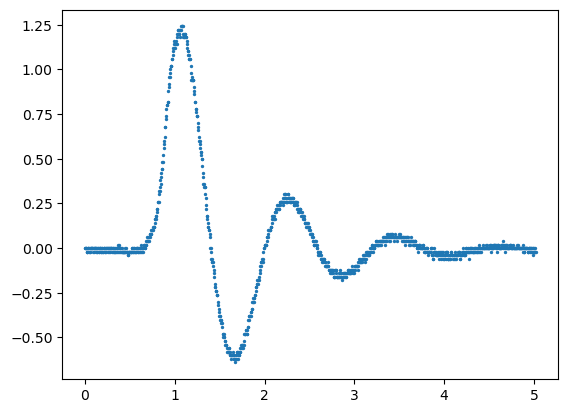

In [5]:
plt.scatter(X, Y, s=2)

In [6]:
N = 258
dt = X[1]-X[0]

X = X.iloc[N:]
Y = Y.iloc[N:]
Yerr = Yerr.iloc[N:]

X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
Yerr = Yerr.reset_index(drop=True)

X = X - N*dt

X

0      0.000
1      0.004
2      0.008
3      0.012
4      0.016
       ...  
993    3.972
994    3.976
995    3.980
996    3.984
997    3.988
Name: t (s), Length: 998, dtype: float64

In [7]:
Y

0      1.22
1      1.22
2      1.20
3      1.20
4      1.22
       ... 
993   -0.02
994    0.00
995   -0.02
996   -0.02
997   -0.02
Name: V (V), Length: 998, dtype: float64

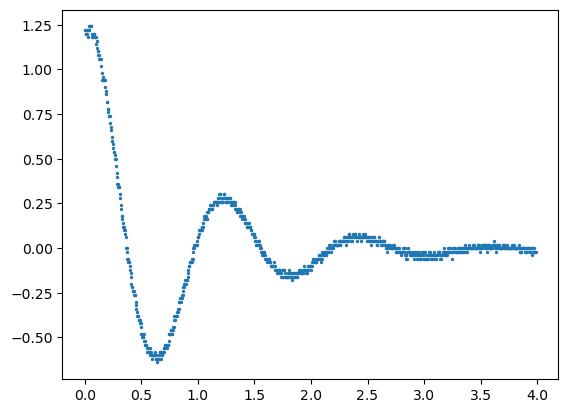

In [8]:
plt.scatter(X, Y, s=2)

In [9]:
#V0 = Y[0]

def fit(X, gamma, omega, delta, C, V0):
    return V0*np.exp(-gamma*X/2)*np.cos(omega*X + delta) + C

popt, pcov = curve_fit( fit, X, Y, absolute_sigma=True, maxfev = 10000 )

In [10]:
gamma = popt[0]
omega = popt[1]
delta = popt[2]
C = popt[3]
V0 = popt[4]

gammaerr = np.sqrt(pcov[0,0])
omegaerr = np.sqrt(pcov[1,1])

print(gamma)
print(omega)

print(gammaerr)
print(omegaerr)

2.416242001202613
5.27847112416873
0.47857582891779377
0.30132198430451645


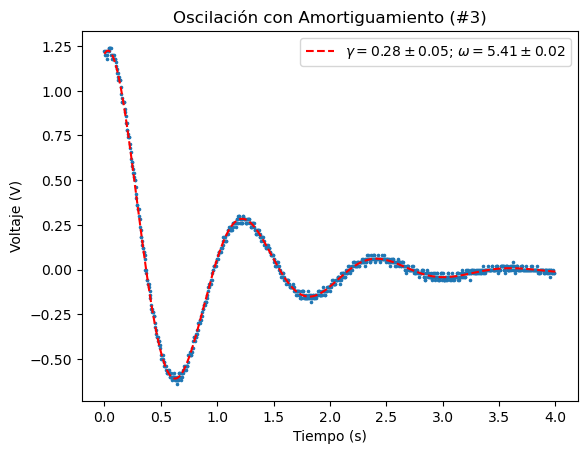

In [11]:
x = np.linspace(0, 4, 40001)
y = fit(x, gamma, omega, delta, C, V0)

plt.plot(x, y, color="red", linestyle="--", label=r"$\gamma = 0.28\pm 0.05$" + "; " + r"$\omega = 5.41\pm 0.02$")
plt.scatter(X, Y, s=2.5)

plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Oscilación con Amortiguamiento (#3)")

plt.legend(loc="upper right")

plt.savefig("act4_img3")

In [12]:
w0 = np.sqrt(omega**2 + (gamma/2)**2)

Q = w0/gamma

print (Q)

2.2410677510548607


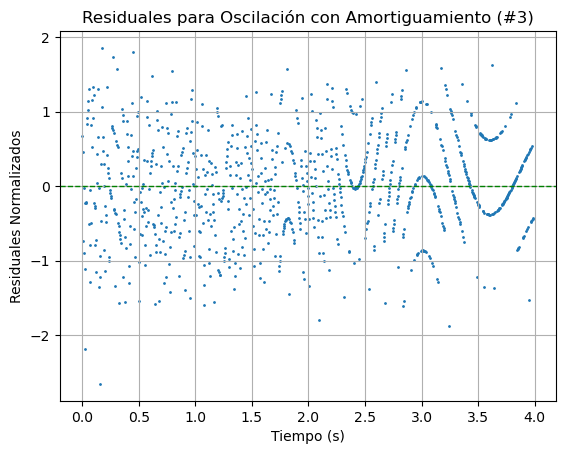

In [13]:
model = fit(X, gamma, omega, delta, C, V0)
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res, s=1)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Tiempo (s)')
ax2.set_title('Residuales para Oscilación con Amortiguamiento (#3)')
ax2.grid()

plt.savefig('act4_img3_res.png', format='png')